# Laboratory 6 - Rootfinding algorithms
#### Grzegorz Fotyga

## 1 Introduction

The goal of the lab is to implement two root-finding algorithms, the bisection method and the secant method, and use them to solve the following two problems:

### Problem 1 
Figure 1 shows a circuit with a resistor, an inductor, and a capacitor in parallel. Kirchhoff’s rules can be used to express the impedance magnitude of the system as follows:

$|Z| = \dfrac{1}{\sqrt{\dfrac{1}{R^2} + (\omega C - \dfrac{1}{\omega L})^2}}  \   \   \   \  (1)$       


where $\omega$ is the angular frequency. Find the $\omega$ that results in an impedance of $75 \Omega$. For the following parameters: R = $725\Omega$, C = 8e−5F, L = 2H, with initial interval $\omega \in \left< 1,50 \right>$  and $\epsilon_f$ = 1e−12.


### Problem 2

The upward velocity of a rocket can be computed by the following formula 

$v = u \text{ln}\left(\dfrac{m_0}{m_0 - qt} \right) - gt     \  \    \  \    (2)$    


where $t$ denotes the time, $v$ is the upward velocity, $m_0$ - the initial mass of the rocket at time $t = 0$, $u$ - the velocity at which fuel is expelled relative to the rocket, $q$ - the fuel consumption rate, $g = 9.81m/s2$ - the downward acceleration of gravity. Compute the time, at which $v = 750m/s$, assuming $m_0 = 150000kg$, $q = 2700kg/s$, $u = 2000m/s$. Set the initial interval to: $t \in \left< 1, 50 \right>$, and the tolerance to: $\epsilon_f$ = 1e−12.



In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('circuit.png')
imgplot = plt.imshow(img)
plt.axis('off')  
plt.show()

SyntaxError: not a PNG file (<string>)

### Task 1

- Define a function whose input parameter is $\omega$ and output parameter is impedance $Z$, based on formula (1).
- Define a function whose input parameter is a time $t$ and output parameter is velocity $v$, based on formula (2).


In [42]:
import math 
import numpy as np

# first part

R = 725
L = 2
C = 0.00008

def Zwada(omega):
    return (1/math.sqrt(1/R**2 + (omega*C - 1/(omega*L))**2)-75)

#second part

g=9.81
v=750
m0=150000
q=2700
u=2000

def Velocity(time):
    return (u*math.log(m0/(m0-q*time))-g*time-750)


### Task 2

Implement bisection algorithm in a form of a function with the following input parameters: 
- initial interval - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify two stopping criterions:
- absoulte value of a function in the middle of subregion will drop below $\epsilon_f$
or:
- width of subregion drops below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your bisection algorithm on a simple function (suggest one!)

In [ ]:
def bisection_Alg(f, a, b, e=1e-12, max_Iteration=1000):
    if f(a)*f(b)>=0:
        raise ValueError("Function must change the value on the interval")
    
    for i in range(max_Iteration):
        c=(a+b)/2 #division by 2
        fc=f(c)

        if abs(fc)<e or (b-a)/2<e: #conditions
            return c, i+1
        
        if f(a)*fc<0: #checks in witch side of the set function changes the sign
            b=c #if in [a, c] then we change b to c
        else:
            a=c

    raise RuntimeError("Max iteration was done")

#test

def function(x):
    return x**2-2


root_b, num_of_iter_b= bisection_Alg(function, 1, 2)

print(f"Root: {root_b}, iterations: {num_of_iter_b}")



Root: 1.4142135623733338, iterations: 38


### Task 3

Implement secant algorithm in a form of a function with the following input parameters: 
- the first two points - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify a stopping criterion:
- absoulte value of a function in the current point will drop below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your secant algorithm on a simple function (suggest one!)

In [ ]:
def secant_Alg(f, a, b, e=1e-12, max_Iteration=1000):
    for i in range(max_Iteration):
        fa=f(a)
        fb=f(b)
    
        if fb-fa==0: #checking if it is not xero
            raise ZeroDivisionError("We can not divided by 0")
        
        x=b-fb*(b-a)/(fb-fa) #wzor metody siecznych

        if abs(f(x))<e: #if we found the number that is smaller than E then we return
            return x, i+1
        
        a, b=b , x

    raise RuntimeError("Max iteration was done")

#test

def function(x):
    return x**2-2


root_s, num_of_iter_s = secant_Alg(function, 1, 2)

print(f"Root: {root_s}, iterations: {num_of_iter_s}")

Root: 1.4142135623730954, iterations: 6


### Task 4

Test your algorithms on the real problems specified in the previous points. How many iterations did each method take to converge? What is the value of $\omega$ and $t$ you are looking for?

In [45]:
# omega

root_b_omega, num_of_iter_b_omega = bisection_Alg(Zwada, 1, 50)
root_s_omega, num_of_iter_s_omega = secant_Alg(Zwada, 1, 50)

print("Omega:")
print("Bisection:")
print(f"Root: {root_b_omega}, iterations: {num_of_iter_b_omega}")
print("Secant:")
print(f"Root: {root_s_omega}, iterations: {num_of_iter_s_omega}")
print(" ")

#velocity

root_b_time, num_of_iter_b_time = bisection_Alg(Velocity, 1, 50)
root_s_time, num_of_iter_s_time, = secant_Alg(Velocity, 1, 50)

print("Time:")
print("Bisection:")
print(f"Root: {root_b_time}, iterations: {num_of_iter_b_time}")
print("Secant:")
print(f"Root: {root_s_time}, iterations: {num_of_iter_s_time}")

Omega:
Bisection:
Root: 31.656891705126483, iterations: 46
Secant:
Root: 31.656891705126682, iterations: 7
 
Time:
Bisection:
Root: 21.13241513592571, iterations: 46
Secant:
Root: 21.132415135926294, iterations: 8


### Task 5

As the output data in the Bisection and Secant algorithms, add a vector storing subsequent absolute values of the function (in subsequent root approximations). Plot this vector. What can you say about the convergence?

Hint: In subsequent iterations, you compute approximate values of the root as well as the absolute values of the analyzed function at these points. The goal here is to plot (using the plt.semilogy() function) the absolute values of the function. For the last iteration, it should be below 1e-12.

Focus on the convergence rates. Is it linear? Quadratic? Compare it with the results shown in the lecture slides.

Omega:
Bisection:
Root: 31.656891705126483, iterations: 46, log: [18.2524530496015, 21.92134165105921, 0.10324450115477646, 10.318000799846729, 4.9749073213353086, 2.4044298168097242, 1.1429459426603756, 0.5179638636157478, 0.20689103085993565, 0.05170648285884738, 0.025798157219853124, 0.012946869879812084, 0.006427466164311113, 0.003259246141624317, 0.0015842239288161863, 0.0008374826255845846, 0.0003733777716234954, 0.0002320506469573047, 7.066400733890532e-05, 8.069320855952355e-05, 5.014572792561012e-06, 3.282472422938554e-05, 1.3905077452136538e-05, 4.4452527703242595e-06, 2.8465990453696577e-07, 2.080296454209929e-06, 8.978182819419089e-07, 3.0657919580789894e-07, 1.0959638530039228e-08, 1.3685013300346327e-07, 6.29452330258573e-08, 2.599279014248168e-08, 7.516575806221226e-09, 1.7215313619090011e-09, 2.8975080113013973e-09, 5.879883246961981e-10, 5.667430968969711e-10, 1.0601297617540695e-11, 2.780780050670728e-10, 1.3372414287005085e-10, 6.156142262625508e-11, 2.54800625043571

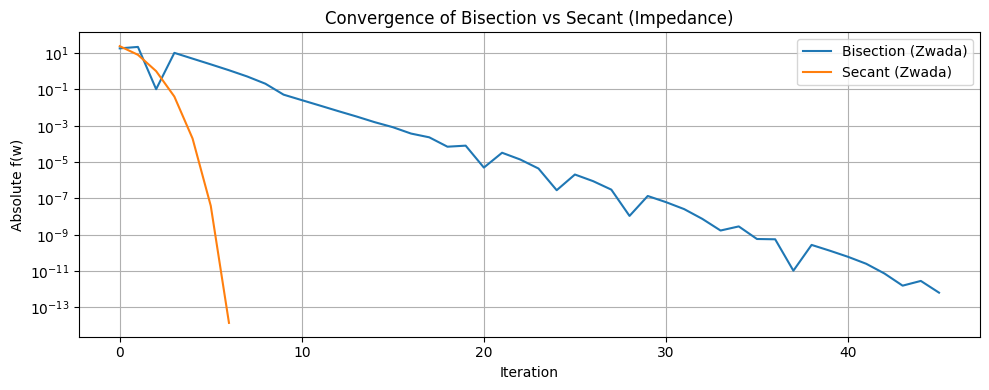

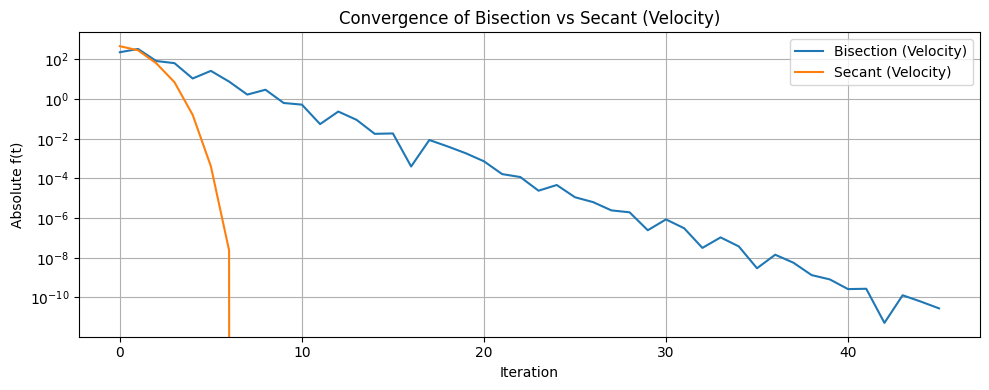

In [47]:
import math
import matplotlib.pyplot as plt


def bisection_with_log(f, a, b, e=1e-12, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("Function must change sign on the interval.")

    log = []
    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        log.append(abs(fc))

        if abs(fc) < e or (b - a) / 2 < e:
            return c, i + 1, log

        if f(a) * fc < 0:
            b = c
        else:
            a = c

    raise RuntimeError("Bisection did not converge.")


def secant_with_log(f, a, b, e=1e-12, max_iter=1000):
    log = []
    for i in range(max_iter):
        fa = f(a)
        fb = f(b)

        if fb - fa == 0:
            raise ZeroDivisionError("Division by zero in secant method.")

        x = b - fb * (b - a) / (fb - fa)
        fx = f(x)
        log.append(abs(fx))

        if abs(fx) < e:
            return x, i + 1, log

        a, b = b, x

    raise RuntimeError("Secant did not converge.")


root_b_z, num_of_iter_b_z, log_b_z = bisection_with_log(Zwada, 1, 50)
root_s_z, num_of_iter_s_z, log_s_z = secant_with_log(Zwada, 1, 50)


print("Omega:")
print("Bisection:")
print(f"Root: {root_b_z}, iterations: {num_of_iter_b_z}, log: {log_b_z}")
print("Secant:")
print(f"Root: {root_s_z}, iterations: {num_of_iter_s_z}, log: {log_s_z}")
print(" ")

root_b_v, num_of_iter_b_v, log_b_v = bisection_with_log(Velocity, 1, 50)
root_s_v, num_of_iter_s_v, log_s_v = secant_with_log(Velocity, 1, 50)

print("Velovity:")
print("Bisection:")
print(f"Root: {root_b_v}, iterations: {num_of_iter_b_v}, log: {log_b_v}")
print("Secant:")
print(f"Root: {root_s_v}, iterations: {num_of_iter_s_v}, log: {log_s_v}")


plt.figure(figsize=(10, 4))
plt.semilogy(log_b_z, label='Bisection (Zwada)')
plt.semilogy(log_s_z, label='Secant (Zwada)')
plt.xlabel('Iteration')
plt.ylabel('Absolute f(w)')
plt.title('Convergence of Bisection vs Secant (Impedance)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.semilogy(log_b_v, label='Bisection (Velocity)')
plt.semilogy(log_s_v, label='Secant (Velocity)')
plt.xlabel('Iteration')
plt.ylabel('Absolute f(t)')
plt.title('Convergence of Bisection vs Secant (Velocity)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
